# Seaborn Library- Visualize the Distribution of A Dataset

http://seaborn.pydata.org/tutorial/distributions.html#plotting-bivariate-distributions

It's ofthen the first thing to get a sense for how the variables are distributed when dealing with a dataset. This note will introduce how to exam univariate & bivariate distributions with **seaborn** library.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
np.random.seed(sum(map(ord, 'distributions')))

## Plotting Univariate Distributions

The most convenient way for a quick looking at univariate distribution in **`seaborn`** is `distplot()` function.

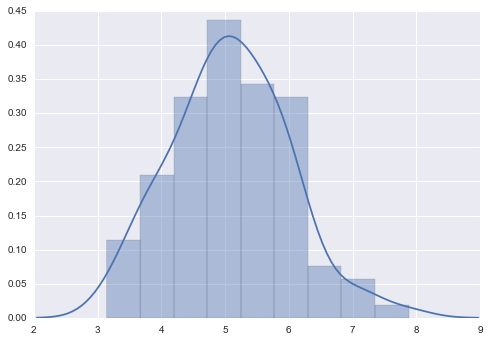

In [4]:
x = np.random.normal(size = 100) + 5
sns.distplot(x)

[-10, 10, 0, 0.5]

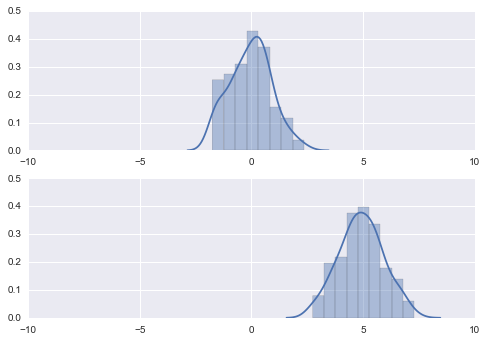

In [5]:
x1 = np.random.normal(size = 100)
x2 = np.random.normal(size = 100) + 5

plt.subplot(211)
sns.distplot(x1)
plt.axis([-10, 10, 0, 0.5])

plt.subplot(212)
sns.distplot(x2)
plt.axis([-10, 10, 0, 0.5])

## Histograms

A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

To illustrate this, we can remove the density curve and add a rug plot, which draws a small vertical tick at each observation. We can make the rug plot itself with **`rugplot()`** function, but it's also available in **`distplot()`**.

(array([  4.,  13.,  12.,  22.,  20.,  15.,   9.,   1.,   3.,   1.]),
 array([ 3.14139202,  3.61484846,  4.08830489,  4.56176132,  5.03521775,
         5.50867418,  5.98213061,  6.45558704,  6.92904348,  7.40249991,
         7.87595634]),
 <a list of 10 Patch objects>)

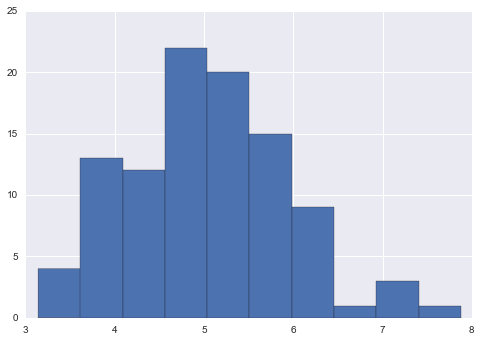

In [6]:
plt.hist(x)

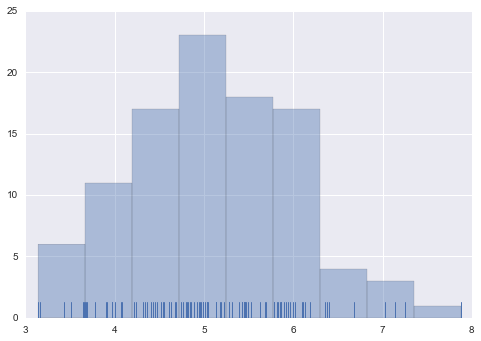

In [7]:
sns.distplot(x, kde=False, rug = True)

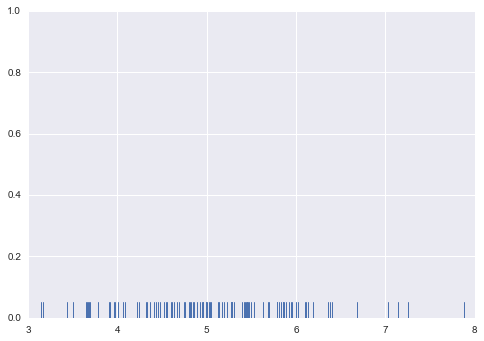

In [8]:
sns.rugplot(x)

When drawing histograms, the main choice we have is the number of bins to use and where to place them. `displot()` uses a simple rule to make a good guess for what the right number is by default, but trying more or fewer might reveal other features as well.

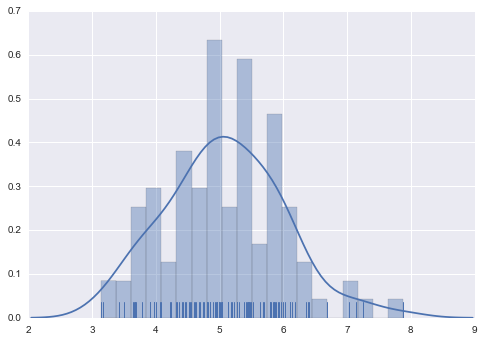

In [9]:
sns.distplot(x, bins=20, kde=True, rug=True)

## Kernel Density Estimation

The kernel density estimation can be a useful tool for plotting the shape of a distribution. Like the histogram, KDE plots encodes the density of observations on one axis with height along the other axis.

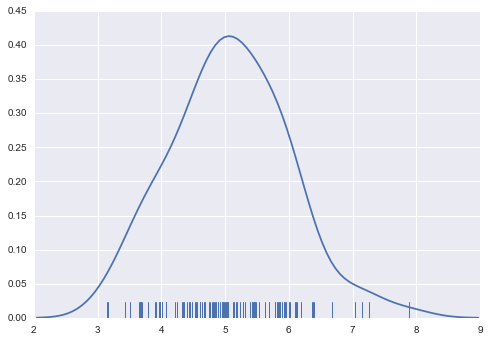

In [10]:
sns.distplot(x, hist=False, rug=True)

Drawing a KDE is more computationally involved than drawing a histogram. What happens is that each observation is first replaced with a normal (Gaussian) curve centered at that value

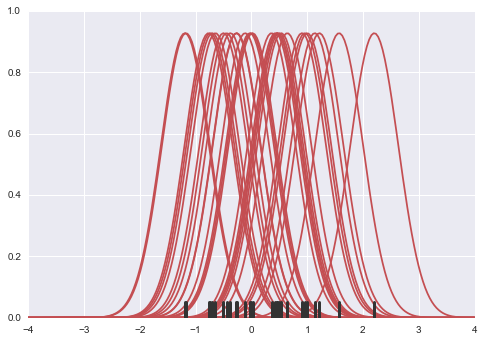

In [11]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1/5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color='r')
    
sns.rugplot(x, color='.2', linewidth = 3)

Next, these curves are summed to compute the value of the density at each point in the support grid. The resulting curve is then normalized so that the area under it is equal to 1:

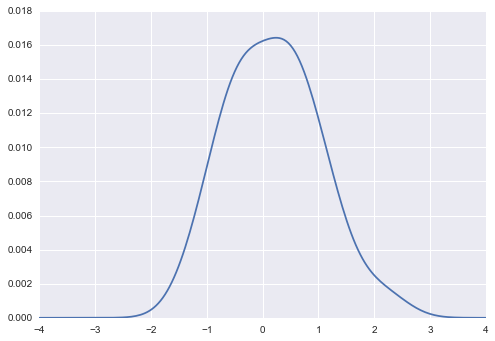

In [12]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density)
plt.plot(support, density)

We will get the same curve if we use **`kdeplot()`** function. Actually this function is used by **`distplot()`**, but it provides a more direct interface with easier access to other options when you just want the density estimate

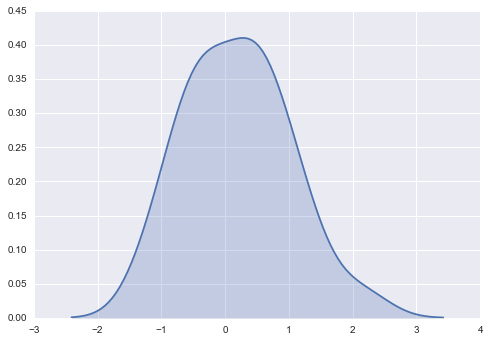

In [13]:
sns.kdeplot(x, shade=True)

The bandwidth (**`bw`**) parameter of the KDE conotrols how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values:

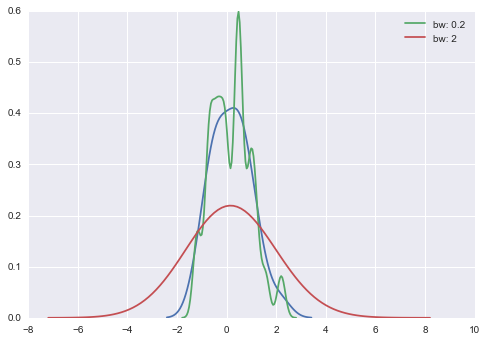

In [14]:
sns.kdeplot(x)
sns.kdeplot(x, bw = .2, label="bw: 0.2")
sns.kdeplot(x, bw = 2, label="bw: 2")
plt.legend()

The nature of the Gaussian KDE prcess means that estimation extends past the largest and smallest values in the dataset. It's possible to control how far past the extreme values the curve is drawn with the **`cut`** parameter; however, this only influences how the curve is drawn and not how it is fit:

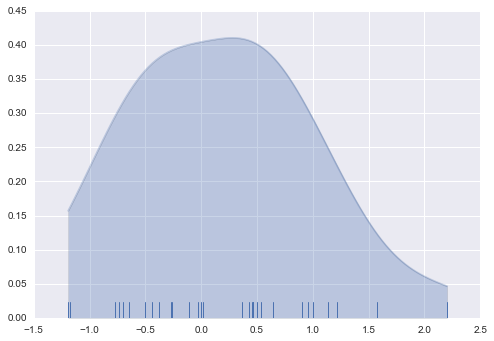

In [15]:
sns.kdeplot(x, shade=True, cut = 0, alpha = 0.3)
sns.rugplot(x)

## Fitting Parametric Distributions

We can also use `distplot()` to fit a parametric distribution to a dataset and visually evaluate how closly it corresponds to the observed data:

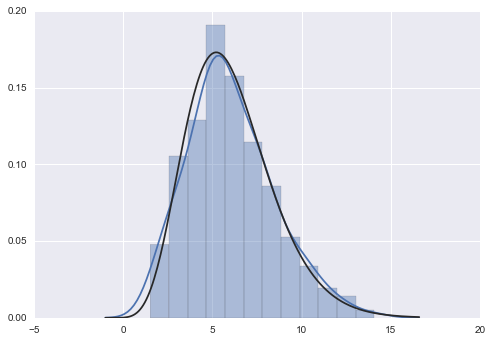

In [16]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde = True, fit = stats.gamma)

## Plotting Bivariate Distributions

We also need to visualize a bivariate distribution of two variables sometimes. The easy way to do this in `seaborn` is **`jointplot()`** function, which creates a multi-panel figure that shows both the bivariate (or joint) relationship between variables along with the univariate (or marginal) distribution of each on separate axes.

In [17]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

### Scatterplots

The most basic way to visualize a bivariate distribution is a scatterplot. This is analgous to a rug plot on two dimensions. We can draw a scatterplot with matplotlilb `plt.scatter()`, and it's also the default kind of plot shown by `jointplot()` function.

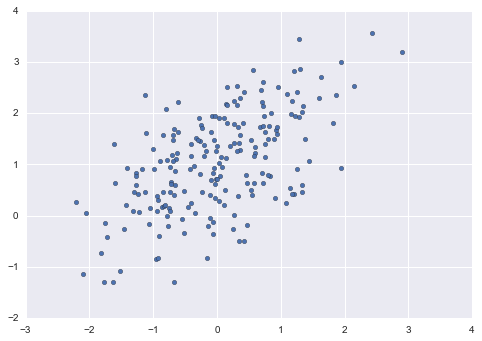

In [18]:
plt.scatter(df.x, df.y)

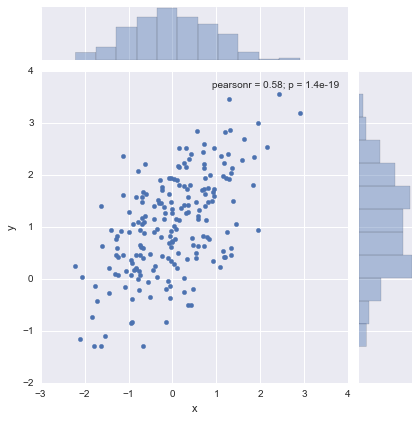

In [19]:
sns.jointplot(x='x', y='y', data = df)

# or
# sns.jointplot(df.x, df.y)

### Hexbin Plots

The bivariate analogue of a histogram is known as a 'hexbin' plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It's available through the matplotlib `plt.hexbin()` function and as a style in `jointplot()`. It looks best with a white background.

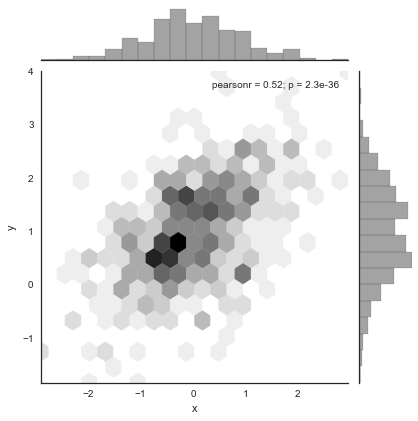

In [20]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 500)
df = pd.DataFrame(data, columns=['x', 'y'])

with sns.axes_style("white"):
    sns.jointplot(x=df.x, y=df.y, kind="hex", color="k");

### Kernel Density Estimation

It's also possible to sue the kernle density estimation procedure descirebed above to visualize a bivariate distribution. In `seaborn`, this kind of plot is shown with a coontour plot and is available as a style in `jointplot()`:

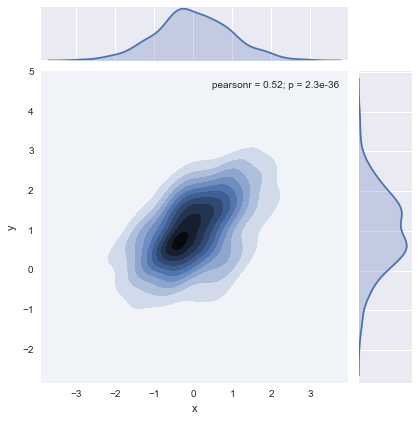

In [21]:
sns.jointplot(x='x', y='y', data = df, kind = 'kde')

We can also draw a two-dimensional kernel density plot with **`kdeplot()`** function. This allows you to draw this kind of plot onto a specific (and possibly already existing) matplotlib axes, whereas the **`jointplot()`** function manages its own figure:

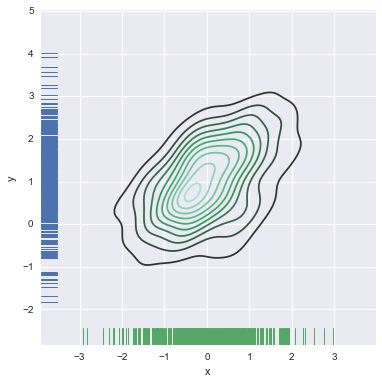

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

If we wish to show the bivariate density more continuously, we can simply increase the number of contour levels.

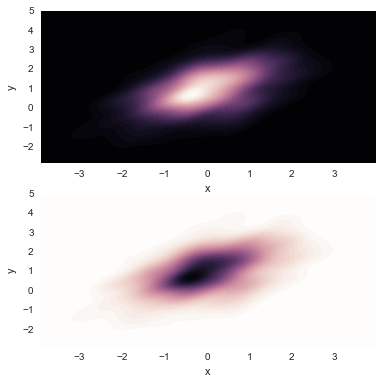

In [23]:
f, ax = plt.subplots(figsize=(6, 6))

plt.subplot("211")
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

plt.subplot("212")
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

The **`jointplot()`** function uses a `JointGrid` to manage the figure. For more flexibility, you may want to draw your figure by using `JointGrid` directly. `jointplot()` returns the `JointGrid` object after plotting, which you can use to add more layers or to tweak other aspects of the visualization.

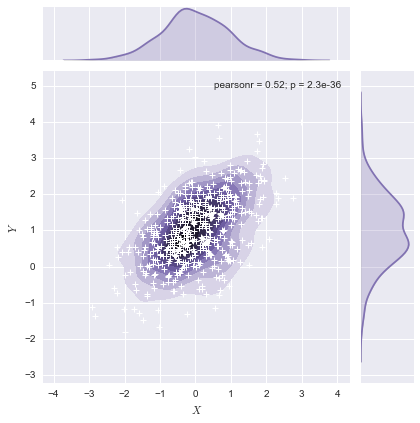

In [24]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

## Visualizing Pairwise Relationships in A Dataset

To plot multiplev pairwise bivariate distributions in a dataset, we can use **`pairplot()`** function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. By default, it also draws the univariate distribution of each variable on the diagonal Axes:

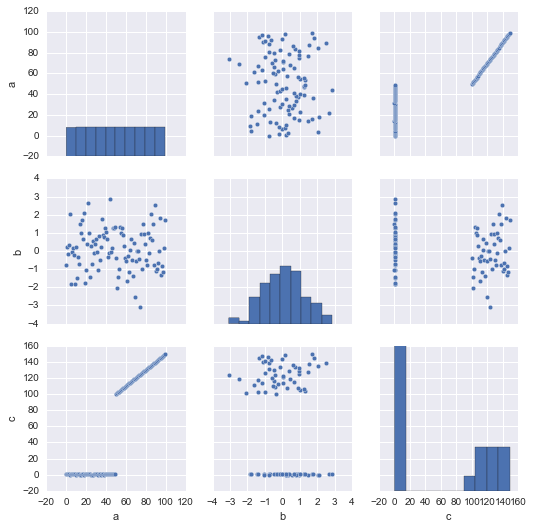

In [25]:
dat = pd.DataFrame({"a":range(100),
                    "b":np.random.normal(0, 1, 100),
                    "c":np.array(list(np.random.random(50)) + list(np.array(range(50)) + 100))})

sns.pairplot(dat)

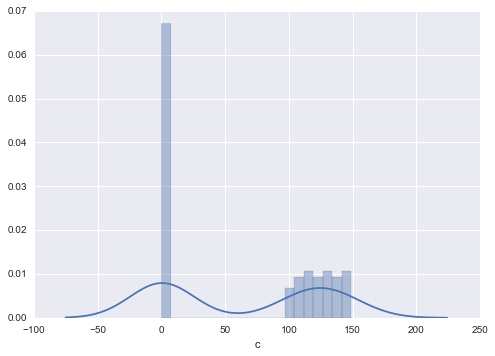

In [26]:
sns.distplot(dat.c, bins = 20)

Much like the relationship between `jointplot()` and `JointGrid`, the `pairplot()` function is built on top of a `PairGrid` object, which can be used directly for more flexibility:

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


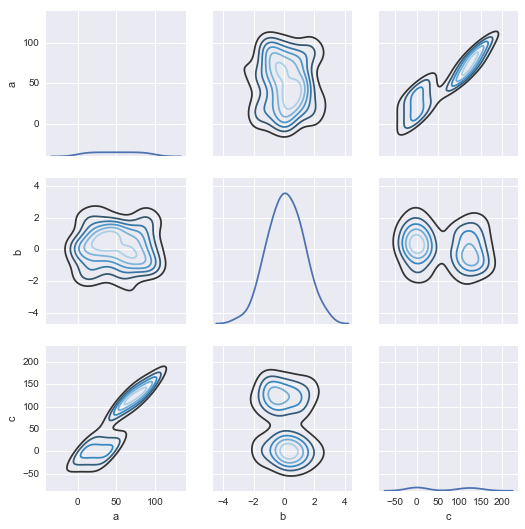

In [27]:
g = sns.PairGrid(dat)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);